In [1]:
import wrds
import pandas as pd
import numpy as np
import ot
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import scipy as sp

In [2]:
conn = wrds.Connection(wrds_username='jacobf1')

Loading library list...
Done


In [5]:
sp500_tickers = []
with open('sp500.txt', 'r') as f:
    for line in f:
        sp500_tickers.append(line.strip())
sp500_tickers[:5]

['AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL']

In [3]:
company_df = pd.read_csv('large_companies.csv')
us_companies = company_df[company_df['country'] == 'United States']
us_tickers = us_companies['Symbol'].tolist()

In [4]:
us_tickers = us_tickers[:2000] # limit to 2000 companies
for i in range(len(us_tickers)):
    us_tickers[i] = us_tickers[i].replace('-', '.')

In [5]:
ibes_tickers = []
for t in tqdm(us_tickers):
    try:
        data = conn.raw_sql(f"""SELECT ticker, oftic, cname, estimator, analys, FPI, MEASURE, VALUE, FPEDATS, ANNDATS, ANNTIMS, ACTUAL, ANNDATS_ACT, ANNTIMS_ACT
                         FROM tr_ibes.det_epsus
                         WHERE oftic = '{t}'
                         and anndats >= '01/01/2010'
                         and fpi = '6'
                         """)
        if data.shape[0] == 0:
            print(f"No data for {t}")
        else:
            ibes_ticker = data['ticker'].iloc[0]
            ibes_tickers.append((t, ibes_ticker))
        # print(t, data.shape)
    except Exception as e:
        print(f"Error for {t}: {e}")

  7%|▋         | 146/2000 [00:08<02:06, 14.62it/s]

No data for LBSI


 13%|█▎        | 258/2000 [00:15<01:32, 18.84it/s]

No data for BF.A


 20%|██        | 409/2000 [00:23<01:22, 19.28it/s]

No data for FMCCT


 23%|██▎       | 453/2000 [00:25<01:13, 21.01it/s]

No data for LSXMB


 36%|███▋      | 730/2000 [00:39<00:53, 23.80it/s]

No data for PSHZF


 38%|███▊      | 760/2000 [00:40<00:56, 22.07it/s]

No data for CWEN


 53%|█████▎    | 1063/2000 [00:53<00:40, 23.22it/s]

No data for PSTH


 57%|█████▋    | 1141/2000 [00:57<00:35, 24.51it/s]

No data for FNMAL
No data for AFFS


 60%|██████    | 1207/2000 [01:00<00:31, 24.89it/s]

No data for GBTC


 62%|██████▏   | 1243/2000 [01:01<00:32, 23.60it/s]

No data for GTII.CN


 66%|██████▌   | 1319/2000 [01:04<00:27, 24.99it/s]

No data for TRUL.CN


 70%|███████   | 1400/2000 [01:08<00:25, 23.82it/s]

No data for OZON.ME


 71%|███████   | 1418/2000 [01:09<00:24, 24.09it/s]

No data for RAZFF


 75%|███████▌  | 1505/2000 [01:12<00:19, 25.97it/s]

No data for 7LX.F


 83%|████████▎ | 1665/2000 [01:19<00:13, 24.91it/s]

No data for DWAC


 87%|████████▋ | 1740/2000 [01:22<00:10, 24.64it/s]

No data for FINN


 87%|████████▋ | 1746/2000 [01:22<00:10, 25.27it/s]

No data for UVV


 90%|████████▉ | 1794/2000 [01:24<00:08, 25.40it/s]

No data for RILY


 91%|█████████ | 1821/2000 [01:25<00:07, 25.30it/s]

No data for DEC.L


 95%|█████████▌| 1905/2000 [01:29<00:03, 23.80it/s]

No data for CSVI


100%|██████████| 2000/2000 [01:33<00:00, 21.49it/s]


In [519]:
for oftic, ibes in tqdm(ibes_tickers):
    data = conn.raw_sql(f"""SELECT ticker, oftic, cname, estimator, analys, FPI, MEASURE, VALUE, FPEDATS, ANNDATS, ANNTIMS, ACTUAL, ANNDATS_ACT, ANNTIMS_ACT
                         FROM tr_ibes.det_epsus
                         WHERE ticker = '{ibes}'
                         and anndats >= '01/01/2010'
                         and fpi = '6'
                         """)
    data.to_csv(f"data/ibes/{oftic}.csv", index=False)

100%|██████████| 1979/1979 [01:47<00:00, 18.42it/s]


In [6]:
with open('ibes_tickers.pkl', 'wb') as f:
    pickle.dump(ibes_tickers, f)

In [8]:
with open('ibes_tickers.pkl', 'rb') as f:
    ibes_tickers = pickle.load(f)

In [8]:
ibes_data = dict()
for oftic, ibes in tqdm(ibes_tickers):
    data = pd.read_csv(f"data/ibes/{oftic}.csv")
    ibes_data[oftic] = data

100%|██████████| 1979/1979 [00:02<00:00, 756.04it/s] 


In [12]:
ibes_data['AAPL'].head()

,ticker,oftic,cname,estimator,analys,fpi,measure,value,fpedats,anndats,anntims,actual,anndats_act,anntims_act
0,AAPL,AAPL,APPLE INC,2343.0,129986.0,6,EPS,0.0746,2009-12-31,2010-01-06,07:19:00,0.1311,2010-01-25,16:25:00
1,AAPL,AAPL,APPLE INC,3037.0,49595.0,6,EPS,0.0729,2009-12-31,2010-01-07,02:05:00,0.1311,2010-01-25,16:25:00
2,AAPL,AAPL,APPLE INC,118.0,70648.0,6,EPS,0.0736,2009-12-31,2010-01-07,18:30:00,0.1311,2010-01-25,16:25:00
3,AAPL,AAPL,APPLE INC,1460.0,91167.0,6,EPS,0.0761,2009-12-31,2010-01-13,07:34:00,0.1311,2010-01-25,16:25:00
4,AAPL,AAPL,APPLE INC,100.0,72446.0,6,EPS,0.0736,2009-12-31,2010-01-15,00:16:00,0.1311,2010-01-25,16:25:00


In [13]:
ibes_data['AAPL']['anndats_act'].dropna().unique()

array(['2010-01-25', '2010-04-20', '2010-07-20', '2010-10-18',
       '2011-01-18', '2011-04-20', '2011-07-19', '2011-10-18',
       '2012-01-24', '2012-04-24', '2012-07-24', '2012-10-25',
       '2013-01-23', '2013-04-23', '2013-07-23', '2013-10-28',
       '2014-01-27', '2014-04-23', '2014-07-22', '2014-10-20',
       '2015-01-27', '2015-04-27', '2015-07-21', '2015-10-27',
       '2016-01-26', '2016-04-26', '2016-07-26', '2016-10-25',
       '2017-01-31', '2017-05-02', '2017-08-01', '2017-11-02',
       '2018-02-01', '2018-05-01', '2018-07-31', '2018-11-01',
       '2019-01-29', '2019-04-30', '2019-07-30', '2019-10-30',
       '2020-01-28', '2020-04-30', '2020-07-30', '2020-10-29',
       '2021-01-27', '2021-04-28', '2021-07-27', '2021-10-28',
       '2022-01-27', '2022-04-28', '2022-07-28', '2022-10-27',
       '2023-02-02', '2023-05-04', '2023-08-03', '2023-11-02',
       '2024-02-01', '2024-05-02', '2024-08-01', '2024-10-31'],
      dtype=object)

In [14]:
ibes_data['NVDA']['anndats_act'].dropna().unique()

array(['2010-02-17', '2010-05-13', '2010-08-12', '2010-11-11',
       '2011-02-16', '2011-05-12', '2011-08-11', '2011-11-10',
       '2012-02-15', '2012-05-11', '2012-08-09', '2012-11-08',
       '2013-02-13', '2013-05-09', '2013-08-08', '2013-11-07',
       '2014-02-12', '2014-05-06', '2014-08-07', '2014-11-06',
       '2015-02-11', '2015-05-07', '2015-08-06', '2015-11-05',
       '2016-02-17', '2016-05-12', '2016-08-11', '2016-11-10',
       '2017-02-09', '2017-05-09', '2017-08-10', '2017-11-09',
       '2018-02-08', '2018-05-10', '2018-08-16', '2018-11-15',
       '2019-02-14', '2019-05-16', '2019-08-15', '2019-11-14',
       '2020-02-13', '2020-05-21', '2020-08-19', '2020-11-18',
       '2021-02-24', '2021-05-26', '2021-08-18', '2021-11-17',
       '2022-02-16', '2022-05-25', '2022-08-24', '2022-11-16',
       '2023-02-22', '2023-05-24', '2023-08-23', '2023-11-21',
       '2024-02-21', '2024-05-22', '2024-08-28'], dtype=object)

In [537]:
for t, data in ibes_data.items():
    data = data.dropna()
    if data['anndats_act'].unique().shape[0] != 20:
        print(t, data['anndats_act'].unique().shape)

AAPL (60,)
MSFT (60,)
GOOG (60,)
AMZN (60,)
TSLA (57,)
BRK.A (60,)
FB (50,)
JNJ (60,)
UNH (59,)
V (60,)
NVDA (59,)
XOM (60,)
JPM (60,)
PG (60,)
MA (60,)
WMT (59,)
CVX (60,)
PFE (60,)
HD (60,)
BAC (60,)
LLY (60,)
KO (59,)
ABBV (47,)
MRK (60,)
PEP (60,)
TMO (59,)
AVGO (59,)
VZ (60,)
ABT (60,)
DIS (60,)
ADBE (59,)
CMCSA (60,)
COST (59,)
ORCL (59,)
DHR (60,)
CSCO (60,)
MCD (60,)
INTC (60,)
NKE (59,)
WFC (60,)
BMY (60,)
TMUS (60,)
PM (60,)
CRM (59,)
TXN (60,)
AMD (60,)
UPS (60,)
T (60,)
QCOM (60,)
MS (60,)
NEE (60,)
COP (60,)
RTX (60,)
UNP (60,)
AMGN (60,)
HON (60,)
CVS (60,)
SCHW (60,)
LOW (59,)
AXP (60,)
ANTM (60,)
SPGI (60,)
IBM (60,)
LMT (60,)
AMT (60,)
CAT (59,)
GS (60,)
INTU (59,)
DE (59,)
C (60,)
AMAT (60,)
MO (60,)
PYPL (38,)
BLK (60,)
PLD (60,)
ADP (60,)
SYK (60,)
NOW (49,)
MDLZ (60,)
BKNG (60,)
DUK (60,)
EL (60,)
ADI (59,)
SBUX (60,)
CI (59,)
NFLX (60,)
GE (60,)
MMM (60,)
CCI (60,)
GILD (60,)
ISRG (60,)
CHTR (59,)
SO (60,)
BX (60,)
MU (59,)
ZTS (48,)
MMC (60,)
USB (60,)
EOG (60,)


There are a lot of date mismatches. What we really should do is align dates to match dates as close together as possible. This is a multidimensional assignment problem (MAP) (which is NP-Hard). However, we still need to solve it for this dataset. So, we will use the `kap` library, which implements some algos for MAP problems.

This was a valiant effort, but takes too long for our purposes. We know the start and end date have 5 years and 4 quarters per year. Thus, we know there are 20 quarters in total to fit everything into. Thus, our problem is far more structured than a general MAP problem. We can use this to our advantage and solve the problem in a more efficient manner.

We will simply solve a linear assignment problem to match each date to some "base" point. Our "base" point will be Apple since it has 20 unique dates in this dataset.

In [15]:
unique_dates = dict()
max_length = 60
for t, data in ibes_data.items():
    dates = pd.to_datetime(data['anndats_act'].dropna().unique(), format='%Y-%m-%d')
    dates = np.array(list(dates) + [pd.NaT] * (max_length - len(dates)))
    unique_dates[t] = dates

In [16]:
from scipy.optimize import linear_sum_assignment

In [17]:
cost_matrices = [] # cost matrix for 'AAPL' to all other tickers

base_date = unique_dates['AAPL']

aligned_dates = dict()

for t, d in unique_dates.items():
    cost_matrix = []
    for d1 in base_date:
        row = []
        for d2 in d:
            row.append(abs((d1 - d2).days) if pd.notna(d1) and pd.notna(d2) else 365*5*2)
        cost_matrix.append(row)
    row_ind, col_ind = linear_sum_assignment(cost_matrix, maximize=False)
    aligned_dates[t] = d[col_ind]

In [22]:
aligned_dates['COST']

array([Timestamp('2010-03-03 00:00:00'), Timestamp('2010-05-27 00:00:00'),
       Timestamp('2010-10-06 00:00:00'), Timestamp('2010-12-08 00:00:00'),
       Timestamp('2011-03-02 00:00:00'), Timestamp('2011-05-25 00:00:00'),
       Timestamp('2011-10-05 00:00:00'), Timestamp('2011-12-08 00:00:00'),
       Timestamp('2012-02-29 00:00:00'), Timestamp('2012-05-24 00:00:00'),
       Timestamp('2012-10-10 00:00:00'), Timestamp('2012-12-12 00:00:00'),
       Timestamp('2013-03-12 00:00:00'), Timestamp('2013-05-30 00:00:00'),
       Timestamp('2013-10-09 00:00:00'), Timestamp('2013-12-11 00:00:00'),
       Timestamp('2014-03-06 00:00:00'), Timestamp('2014-05-29 00:00:00'),
       Timestamp('2014-10-08 00:00:00'), Timestamp('2014-12-10 00:00:00'),
       Timestamp('2015-03-05 00:00:00'), Timestamp('2015-05-27 00:00:00'),
       Timestamp('2015-09-29 00:00:00'), Timestamp('2015-12-08 00:00:00'),
       Timestamp('2016-03-02 00:00:00'), Timestamp('2016-05-25 00:00:00'),
       Timestamp('2016-09

We now have aligned dates. We can use this to properly construct our tabular dataset.

Now, we need to start groupping the data by quarter. We can initially do this by grouping the data by the announce date of the actual EPS.

In [43]:
# since we start at January 1, 2010, we can assume that the first date is the first quarter of 2010
quarterly_data = dict()
quarterly_actual = dict() # actual value, announcement date, announcement time
quarterly_means = dict()
for oftic, data in tqdm(ibes_data.items()):
    data = data.dropna(axis=0, subset=['anndats_act'])
    starting_year = 2010 # we start at January 1, 2010
    for i, date in enumerate(aligned_dates[oftic]):
        quarter_num = (i % 4) + 1 # 1,2,3,4
        year = starting_year + (i // 4)
        if date is pd.NaT:
            quarterly_actual[oftic, year, quarter_num] = None
            quarterly_data[oftic, year, quarter_num] = None
            continue
        date = date.strftime('%Y-%m-%d')
        subdata = data[data['anndats_act'] == date].copy()
        
        quarterly_actual[oftic, year, quarter_num] = (subdata['actual'].iloc[0], 
                                                      subdata['anndats_act'].iloc[0],
                                                      subdata['anntims_act'].iloc[0])
        subdata['ann_datetime'] = pd.to_datetime(subdata['anndats'] + ' ' + subdata['anntims'], format='%Y-%m-%d %H:%M:%S')
        
        # Align to have the same means
        mean_value = subdata['value'].mean()
        subdata['value'] = subdata['value'] # - mean_value
        quarterly_means[oftic, year, quarter_num] = mean_value
        
        quarterly_data[oftic, year, quarter_num] = subdata[['value', 'ann_datetime']]

100%|██████████| 1979/1979 [00:46<00:00, 42.64it/s]


In [45]:
with open('quarterly_actual.pkl', 'wb') as f:
    pickle.dump(quarterly_actual, f)

with open('quarterly_data.pkl', 'wb') as f:
    pickle.dump(quarterly_data, f)
    
with open('quarterly_means.pkl', 'wb') as f:
    pickle.dump(quarterly_means, f)

In [23]:
with open('quarterly_actual.pkl', 'rb') as f:
    quarterly_actual = pickle.load(f)
    
with open('quarterly_data.pkl', 'rb') as f:
    quarterly_data = pickle.load(f)
    
with open('quarterly_means.pkl', 'rb') as f:
    quarterly_means = pickle.load(f)

We have 5 years: 2020, 2021, 2022, 2023, and 2024.

We have 4 quarters in a year: Q1, Q2, Q3, and Q4.

Thus, we have 20 columns (year/quarter) to work with and 497 rows (companies)

In [25]:
def wasserstein2(sample1, sample2):
    """Compute the squared 2-Wasserstein distance between two samples.
    Inputs need to be in format (sample, dimension).
    Args:
        sample1 (np.array): 2D array of samples from the first distribution
        sample2 (np.array): 2D array of samples from the second distribution
    """
    C = ot.dist(sample1, sample2, metric='sqeuclidean')
    # Uniform weights for each empirical distribution
    a = np.ones(len(sample1)) / len(sample1)
    b = np.ones(len(sample2)) / len(sample2)

    # Compute optimal transport plan and Wasserstein distance
    P = ot.emd(a, b, C)
    return np.sum(P * C)

print(wasserstein2(np.array([1,2,1]).reshape(-1,1), np.array([1,5,1]).reshape(-1,1)))
print(np.sum((np.sort(np.array([1,2,1])) - np.sort(np.array([1,5,1]))) ** 2) / len(np.array([1,2,1])))
# This is correct

3.0
3.0


In [76]:
def empirical_quantile_function(samples):
    samples_diff = np.concatenate([np.array(samples[0]).reshape(1), np.diff(samples)])
    def quantile_function(q):
        # Compute the empirical CDF values
        n = len(samples)
        cdf = np.arange(1, n + 1) / n
        # Use broadcasting to calculate the Heaviside contributions
        heaviside_matrix = np.heaviside(np.expand_dims(q,1) - np.expand_dims(cdf, 0), 0.0)
        # Add a column of ones to the left of the Heaviside matrix
        first_col = np.ones(heaviside_matrix.shape[0]).reshape(-1, 1)
        heaviside_matrix = np.concatenate([first_col, heaviside_matrix], axis=1)
        # Remove the last column of Heaviside_matrix
        heaviside_matrix = heaviside_matrix[:, :-1]
        # Compute quantile values by summing contributions
        quantile_values = (heaviside_matrix @ samples_diff)

        return quantile_values
    return quantile_function

def linear_combination(quantile_fns, weights):
    def lin_comb_fn(quantiles):
        # Compute the quantile values for each function
        quantile_values = np.stack([fn(quantiles) for fn in quantile_fns])
        lin_comb_values = np.sum(np.expand_dims(weights,1) * quantile_values, axis=0)
        return lin_comb_values
    return lin_comb_fn

def barycenter(quantile_fns):
    def lin_comb_fn(quantiles):
        # Compute the quantile values for each function
        quantile_values = np.stack([fn(quantiles) for fn in quantile_fns])
        lin_comb_values = np.sum(quantile_values, axis=0) / len(quantile_fns)
        return lin_comb_values
    return lin_comb_fn

def expectation(quantile_func, N = 1000):
    x = np.linspace(0, 1, N)
    return np.trapezoid(quantile_func(x), x=x)

1.9989989989989991
2.0
1.9994994994994995
1.997997997997998


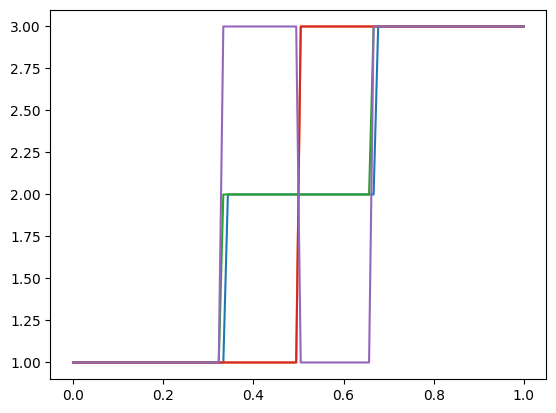

In [82]:
sample_lists = [[1,2,3], [1,3]]

fn1 = empirical_quantile_function(sample_lists[0])
fn2 = empirical_quantile_function(sample_lists[1])

bary_fn = barycenter([fn1, fn2])
lin_fn = linear_combination([fn1, fn1, fn2], [1.0, 1.0, -1.0])
q = np.linspace(0, 1, 100)
for s in sample_lists:
    plt.plot(q, np.quantile(s,q, method='inverted_cdf'))
    
plt.plot(q, fn1(q))
plt.plot(q, fn2(q))
# plt.plot(q, bary_fn(q))
plt.plot(q, lin_fn(q))

print(expectation(fn1))
print(expectation(fn2))
print(expectation(bary_fn))
print(expectation(lin_fn))

In [31]:
# There are a lot of rows, so we will estimate distances for specific rows.
# We will need to make sure that we do not look into the future.
# When calculating distances, we will only look at the past data, using the 
# datestimes when the actual EPS are announced, since we would like to estimate our distributions
# as late as possible (close to the announcement date).


def get_rows_cols(user_user=True):
    cols = [(year, quarter) for year in range(2010, 2025) for quarter in range(1, 5)]
    rows = list(ibes_data.keys())
    if user_user is True:
        return rows, cols
    else:
        return cols, rows

def get_dist(ticker, year, quarter, quarterly_actual, quarterly_data, user_user = True):
    # Returns the squared Wasserstein distance between rows for 1 column
    # Filters to only use past data
    rows, _ = get_rows_cols(user_user)
    data = quarterly_data[ticker, year, quarter]
    if data is None:
        return {}
    # Filter by the announced_datetime
    # sample1 = data[data['ann_datetime'] < current_datetime]['value'].values.reshape(-1,1)
    sample1 = data['value'].values.reshape(-1,1)
    dists = dict()
    actual = quarterly_actual[ticker, year, quarter]
    if actual is None:
        raise Exception(f"No actual data for {ticker} {year} {quarter}")
    _, actual_year, actual_time = actual
    actual_dtime = pd.to_datetime(f'{actual_year} {actual_time}', format='%Y-%m-%d %H:%M:%S')
    y = year
    q = quarter
    t = ticker
    for row in rows:
        if user_user:
            t = row
        else:
            y,q = row
        # only include past data
        raw_data = quarterly_data[t, y, q]
        other_actual = quarterly_actual[t, y, q]
        if raw_data is None or other_actual is None:
            continue
        _, other_year, other_time = other_actual
        other_dtime = pd.to_datetime(f'{other_year} {other_time}', format='%Y-%m-%d %H:%M:%S')
        if other_dtime > actual_dtime:
            continue
        # filtered_data = raw_data[raw_data['ann_datetime'] < current_datetime]
        if raw_data.shape[0] == 0:
            continue
        sample2 = raw_data['value'].values.reshape(-1,1)
        dist = wasserstein2(sample1, sample2)
        dists[row] = dist
    return dists

dists = get_dist('AAPL', 2020, 1, quarterly_actual, quarterly_data, user_user = False)
dists

{(2010, 1): np.float64(1.1199740141170211),
 (2010, 2): np.float64(1.0986384537990257),
 (2010, 3): np.float64(1.0551033832255319),
 (2010, 4): np.float64(0.9808238116468637),
 (2011, 1): np.float64(0.8903536175307951),
 (2011, 2): np.float64(0.8914912968237082),
 (2011, 3): np.float64(0.8629057655782868),
 (2011, 4): np.float64(0.7713198467151011),
 (2012, 1): np.float64(0.6034926149812265),
 (2012, 2): np.float64(0.6192745112278368),
 (2012, 3): np.float64(0.5789535658008274),
 (2012, 4): np.float64(0.6788539845695881),
 (2013, 1): np.float64(0.41939740405913234),
 (2013, 2): np.float64(0.598722964762038),
 (2013, 3): np.float64(0.7593354570397779),
 (2013, 4): np.float64(0.7337845967622572),
 (2014, 1): np.float64(0.39923725913426267),
 (2014, 2): np.float64(0.5918519447888706),
 (2014, 3): np.float64(0.6858909097809761),
 (2014, 4): np.float64(0.6559668316907294),
 (2015, 1): np.float64(0.24058310310283687),
 (2015, 2): np.float64(0.36225231292933124),
 (2015, 3): np.float64(0.4638

In [32]:
threshold = 0.1

neighbors = [row for row, dist in dists.items() if dist < threshold]
neighbors

[(2018, 1), (2019, 1), (2020, 1)]

In [33]:
year = 2020
quarter = 1
ticker = 'AAPL'
actual = quarterly_actual[ticker, year, quarter]
actual_datetime = pd.to_datetime(f'{actual[1]} {actual[2]}', format='%Y-%m-%d %H:%M:%S')

user_user = False
empirical_fn_list = []
for row in neighbors:
    raw_data = quarterly_data[row, year, quarter] if user_user else quarterly_data[ticker, row[0], row[1]]
    filtered_data = raw_data[raw_data['ann_datetime'] < actual_datetime]
    print(row, filtered_data.shape, raw_data.shape)
    empirical_fn_list.append(empirical_quantile_function(np.sort(filtered_data['value'].values)))

(2018, 1) (50, 2) (50, 2)
(2019, 1) (80, 2) (80, 2)
(2020, 1) (47, 2) (47, 2)


1.0681801468134802
1.2475
1.1342127659574466


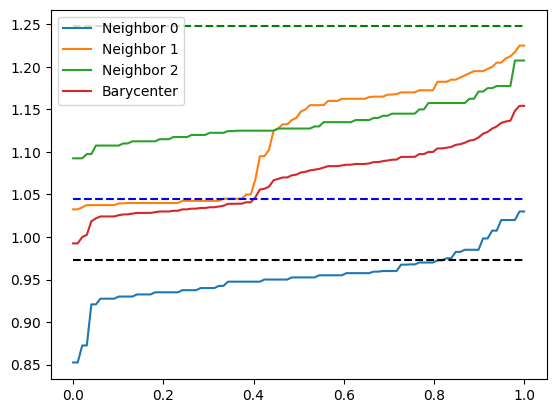

In [35]:
q = np.linspace(0, 1, 100)
for i, fn in enumerate(empirical_fn_list):
    plt.plot(q, fn(q), label='Neighbor ' + str(i))
b_fn = barycenter(empirical_fn_list)
print(expectation(b_fn))
print(quarterly_actual['AAPL', 2020, 1][0])
print(quarterly_data['AAPL', 2020, 1]['value'].mean())
plt.plot(q, b_fn(q), label='Barycenter')
plt.hlines([quarterly_actual['AAPL', 2018, 1][0]], 0, 1, linestyles='--', colors='black')
plt.hlines([quarterly_actual['AAPL', 2019, 1][0]], 0, 1, linestyles='--', colors='blue')
plt.hlines([quarterly_actual['AAPL', 2020, 1][0]], 0, 1, linestyles='--', colors='green')
plt.legend()
plt.show()

Hyperparamter tuning: We can tune the hyperparameter threshold with for the first 50% of the columns and use them to predict the last 50% of the columns. The target this time will not be reconstructing the original distribution, but rather predicting the actual quarter EPS.

In [ ]:
from collections import defaultdict
from hyperopt import hp, fmin, tpe

def get_neighbor_expectation(eta, dists, quarterly_data):
    neighbors = [cell for cell, dist in dists.items() if dist <= eta]
    # The neighbors should already be filtered
    sample_fns = []
    for cell in neighbors:
        sample = quarterly_data[*cell]
        sample_fns.append(empirical_quantile_function(np.sort(sample['value'].values)))
    b_fn = barycenter(sample_fns)
    return expectation(b_fn)

def get_avg_dist_trains(train_cells, average_cols, quarterly_actual, quarterly_data, user_user = True):
    # For each training cell, get the average distances from the average cols
    train_cells_avg_dists = defaultdict(dict)
    for cell in train_cells:
        t,y,q = cell
        row_union = set()
        dists = {}
        for col in average_cols:
            dist = get_dist(t, y, q, quarterly_actual, quarterly_data, user_user)
            row_union = row_union.union(dist.keys())
            dists[col] = dist
        for row in row_union:
            other_cell = (row,y,q) if user_user else (t,*row)
            train_cells_avg_dists[cell][other_cell] = np.mean([dist[row] for dist in dists.values() if row in dist])
    return train_cells_avg_dists

def optimize_eta(average_cols, train_cells, quarterly_data, quarterly_actual, user_user = True, verbose = False):
    train_cells_avg_dists = get_avg_dist_trains(train_cells, average_cols, quarterly_actual, quarterly_data, user_user)
    
    def obj(params):
        eta = params['eta']
        total_error = 0
        
        for cell in train_cells:
            t,y,q = cell
            avg_dist_dict = train_cells_avg_dists[cell]
            neighbor_expectation = get_neighbor_expectation(eta, avg_dist_dict, quarterly_data)
            # Get actual EPS value
            eps = quarterly_actual[t, y, q][0]
            # Calculate error
            total_error += (neighbor_expectation - eps) ** 2
        return total_error / len(train_cells)
    
    # Optimize the objective function
    best_eta = fmin(fn=obj, verbose = verbose, space={'eta': hp.loguniform('eta', -10, 2)}, algo=tpe.suggest, max_evals=50)
    # print(f"Baseline: {obj(0.0)}")
    return best_eta['eta']

eta = optimize_eta(['AAPL', 'MSFT', 'AMZN'], [('AAPL', 2018, 1), ('AAPL', 2019, 1)], 
                   quarterly_data, quarterly_actual, user_user = False, verbose = True)

100%|██████████| 50/50 [00:00<00:00, 413.13trial/s, best loss: 0.002724821599419746]


For a doubly-robust estimator, we could optimize both thresholds separately or simultaneously. We will do the latter.

In [99]:
def get_doubly_robust_estimate(train_cells_avg_dists_user_user, train_cells_avg_dists_item_item, cell, quarterly_data, eta_user_user, eta_item_item):
    avg_dist_dict_user_user = train_cells_avg_dists_user_user[cell]
    avg_dist_dict_item_item = train_cells_avg_dists_item_item[cell]
    
    neighbors_user_user = [c for c, dist in avg_dist_dict_user_user.items() if dist <= eta_user_user]
    neighbors_item_item = [c for c, dist in avg_dist_dict_item_item.items() if dist <= eta_item_item]
    
    sample_fns = []
    for cell1 in neighbors_user_user:
        for cell2 in neighbors_item_item:
            t1,y1,q1 = cell1
            t2,y2,q2 = cell2
            user_sample = quarterly_data[t1, y1, q1]
            item_sample = quarterly_data[t2, y2, q2]
            cross_sample = quarterly_data[t2, y1, q1]
            if user_sample is None or item_sample is None or cross_sample is None:
                continue
            user_fn = empirical_quantile_function(np.sort(user_sample['value'].values))
            item_fn = empirical_quantile_function(np.sort(item_sample['value'].values))
            cross_fn = empirical_quantile_function(np.sort(cross_sample['value'].values))
            sample_fns.append(linear_combination([user_fn, item_fn, cross_fn], [1.0, 1.0, -1.0]))
    # I have no guarantees that this doubly-robust estimator will remain a quantile function.
    # In fact, it most likely will not be because of the negative part.
    return expectation(barycenter(sample_fns))

def optimize_eta_doubly_robost(average_dates, average_tickers, train_cells, quarterly_data, quarterly_actual, verbose=False):
    train_cells_avg_dists_user_user = get_avg_dist_trains(train_cells, average_dates, quarterly_actual, quarterly_data, user_user = True)
    train_cells_avg_dists_item_item = get_avg_dist_trains(train_cells, average_tickers, quarterly_actual, quarterly_data, user_user = False)
    
    def obj(params):
        eta_user_user = params['eta_user_user']
        eta_item_item = params['eta_item_item']
        total_error = 0
        
        for cell in train_cells:
            neighbor_expectation = get_doubly_robust_estimate(train_cells_avg_dists_user_user, train_cells_avg_dists_item_item, cell, quarterly_data, eta_user_user, eta_item_item)
            # Get actual EPS value
            eps = quarterly_actual[*cell][0]
            # Calculate error
            # total_error += (neighbor_expectation - eps) ** 2
            total_error += np.abs((neighbor_expectation - eps) / eps)
            
        return total_error / len(train_cells)
    
    # Optimize the objective function
    best_eta = fmin(fn=obj, verbose = verbose, 
                    space={
                        'eta_user_user': hp.loguniform('eta_user_user', -10, 2),
                        'eta_item_item': hp.loguniform('eta_item_item', -10, 2)
                    }, 
                    algo=tpe.suggest, max_evals=50)
    # print(f"Baseline: {obj(0.0)}")
    return best_eta['eta_user_user'], best_eta['eta_item_item']
    
eta_user, eta_item = optimize_eta_doubly_robost([(2018, 1), (2019, 1)], ['AAPL', 'MSFT'], [('AAPL', 2020, 1)], quarterly_data, quarterly_actual, verbose=True)

100%|██████████| 50/50 [00:12<00:00,  4.02trial/s, best loss: 0.08331377469654029]


In [100]:
eta_user, eta_item

(np.float64(0.001538182761993477), np.float64(0.0001969742616686958))

In [103]:
def relative_error(est,true):
    return np.abs((est - true) / true)

In [104]:
test_cell = ('AAPL', 2020, 1)

avg_dists_user_user = get_avg_dist_trains([test_cell], [(2018, 1), (2019, 1)], quarterly_actual, quarterly_data, user_user = True)
avg_dists_item_item = get_avg_dist_trains([test_cell], ['AAPL', 'MSFT'], quarterly_actual, quarterly_data, user_user = False)

neighbor_expectation = get_doubly_robust_estimate(avg_dists_user_user, avg_dists_item_item, test_cell, quarterly_data, eta_user, eta_item)

print(relative_error(neighbor_expectation, quarterly_actual[*test_cell][0]))
print(relative_error(quarterly_data[*test_cell]['value'].mean(), quarterly_actual[*test_cell][0]))

0.08331377469654029
0.09081141005415108


In [67]:
def get_similar_tickers(ticker, year, quarter, quarterly_actual, quarterly_data):
    rows, cols = get_rows_cols(user_user)
    current_row = (year, quarter)
    row_index = rows.index(current_row)
    print(row_index)
    actual = quarterly_actual[ticker, year, quarter]
    if actual is None:
        raise Exception(f"No actual data for {ticker, year, quarter}")
    eps, actual_date, actual_time = actual
    actual_dtime = pd.to_datetime(f'{actual_date} {actual_time}', format='%Y-%m-%d %H:%M:%S')
    # Create vectors of distances
    distance_vectors = dict()
    for t in tqdm(cols):
        distance = np.zeros(row_index) # row_index + 1 to include the current row
        try:
            dist = get_dist(t, year, quarter, quarterly_actual, quarterly_data, user_user=False)
            for i in range(0, row_index):
                if rows[i] in dist:
                    distance[i] = dist[rows[i]]
                else:
                    distance[i] = np.nan
            distance_vectors[t] = distance
        except Exception:
            continue
    return distance_vectors

distance_vectors = get_similar_tickers('AAPL', 2020, 1, quarterly_actual, quarterly_data)

40


100%|██████████| 1979/1979 [00:08<00:00, 228.36it/s]


In [70]:
cur_vec = distance_vectors['AAPL']
ticker_dist_threshold = 0.04
similar_tickers = []
for t, vec in distance_vectors.items():
    if np.nanmean((vec - cur_vec) ** 2) < ticker_dist_threshold:
        similar_tickers.append(t)
len(similar_tickers)

48

In [73]:
rows, cols = get_rows_cols(user_user=False)
row = rows[30]
print(row)
ticker = 'AAPL'
year = 2020
quarter = 1
# train_test_split = 12

eta = optimize_eta(similar_tickers, [('AAPL', 2018, 1), ('AAPL', 2019, 1)], 
                   quarterly_data, quarterly_actual, user_user = False, verbose=True)

(2017, 3)
100%|██████████| 50/50 [00:00<00:00, 328.29trial/s, best loss: 0.002724821599419746]


In [51]:
def evaluate_eta_test(eta, ticker, year, quarter, 
                      train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means, 
                      user_user = True):
    """Return the squared error for estimating the actual EPS for the given eta and column.
    """
    # Get distances for each column in the test set
    row_dists = dict()
    actual = quarterly_actual[ticker, year, quarter]
    if actual is None:
        raise Exception(f"No actual data for {ticker, year, quarter}")
    eps, actual_date, actual_time = actual
    actual_dtime = pd.to_datetime(f'{actual_date} {actual_time}', format='%Y-%m-%d %H:%M:%S')
    rows, cols = get_rows_cols(user_user)
    current_row = (year, quarter)
    row_index = rows.index(current_row)
    avg_distances = dict()
    if user_user:
        for col in train_cols + test_cols:
            if quarterly_data.get((ticker, col[0], col[1])) is None:
                continue
            dists = get_dist(ticker, col[0], col[1], quarterly_actual, quarterly_data, user_user = True)
        for i in range(0, len(test_cols)):
            # prepend by train columns
            all_dists = [row_dists[c] for c in train_cols] + [row_dists[test_cols[j]] for j in range(i)]
            key_union = set()
            for col in train_cols + test_cols[:i]:
                key_union = key_union | row_dists[col].keys()
            avg_distances[test_cols[i]] = dict()
            # Combine the keys
            for key in key_union:
                avg_distances[test_cols[i]][key] = np.mean([d[key] for d in all_dists if d.get(key) is not None])
    else:
        for i in range(2, row_index + 1):
            row = rows[i]
            avg_distances[row] = dict()
            for col in train_cols:
                dists = None
                if quarterly_data.get((col, row[0], row[1])) is None:
                    continue
                dists = get_dist(col, row[0], row[1], quarterly_actual, quarterly_data, user_user = False)
                # row_dists[col,*row] = dists
                for other_row, dist in dists.items():
                    if avg_distances[row].get(other_row) is None:
                        avg_distances[row][other_row] = []
                    avg_distances[row][other_row].append(dist)
            for other_row in avg_distances[row].keys():
                # Average across columns
                avg_distances[row][other_row] = np.nanmean(avg_distances[row][other_row])
    
    # We rename to not confuse scope
    t = ticker
    y = year
    q = quarter
    total_error = 0
    num_added = 0
    for col in test_cols:
        dists = None
        if user_user is True:
            y, q = col
            dists = avg_distances[col]
        else:
            # t = col
            y,q = col
            dists = avg_distances[col]
        actual = quarterly_actual[t, y, q]
        if actual is None:
            continue
        eps = actual[0]
        if np.isnan(eps):
            continue
        # Calculate the error for the column
        estimated_eps = evaluate_eta_column(eta, t, y, q, dists, 
                                            quarterly_actual, quarterly_data, quarterly_means, 
                                            user_user=user_user)
        # print(dists)
        total_error += np.abs((eps - estimated_eps) / eps) # relative error
        # total_error += (eps - estimated_eps) ** 2
        num_added += 1
        print(f"{t} {y} {q} {eps} {estimated_eps}")
    return total_error / num_added

rows, cols = get_rows_cols(user_user=True)
print(f'Eta: {eta}')
# print('DistNN:', evaluate_eta_test(eta, ticker, year, quarter, cols[:train_test_split], [cols[train_test_split]], quarterly_actual, quarterly_data, quarterly_means), user_user=True)
# print('Base:  ', evaluate_eta_test(0.0, ticker, year, quarter, cols[:train_test_split], [cols[train_test_split]], quarterly_actual, quarterly_data, quarterly_means), user_user=True)
quarter = 2
print(f"DistNN: {evaluate_eta_test(eta, ticker, year, quarter, similar_tickers, [(year,quarter)], quarterly_actual, quarterly_data, quarterly_means,user_user=False) * 100:.4f}%")
print(f"Base:   {evaluate_eta_test(0.0, ticker, year, quarter, similar_tickers, [(year,quarter)], quarterly_actual, quarterly_data, quarterly_means, user_user=False) * 100:.4f}%")

Eta: 0.0028494943236069587
AAPL 2020 2 0.6375 0.6508310810810811
DistNN: 2.0911%
AAPL 2020 2 0.6375 0.6508310810810811
Base:   2.0911%


In [763]:
output_file = 'errors_item_item_small.csv'
_, cols = get_rows_cols(user_user=False)

# eta = optimize_eta(ticker, year, quarter, cols[:train_test_split], quarterly_actual, quarterly_data, quarterly_means, user_user = True, verbose=True)
# eta = optimize_eta(ticker, 2020, 1, cols[:200], quarterly_actual, quarterly_data, quarterly_means, user_user = False, verbose=True)
subset_tickers = set(cols[:100])
year = 2024
quarter = 3

file_exists = False
for t in tqdm(subset_tickers):
    train_cols = list(subset_tickers - set(t))
    test_cols = [t]
    try:
        eta = optimize_eta(t, year, quarter, list(train_cols), quarterly_actual, quarterly_data, quarterly_means, user_user = False, verbose=False)
        test_error = evaluate_eta_test(eta, t, year, quarter, train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means, user_user=False)
        base_error = evaluate_eta_test(0.0, t, year, quarter, train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means, user_user=False)
        
        df = pd.DataFrame({'ticker': [t], 'eta': [eta], 'test_error': [test_error], 'base_error': [base_error]})
        if not file_exists:
            # Write header only for the first row
            df.to_csv(output_file, mode='w', index=False)
            file_exists = True
        else:
            # Append to the file without writing the header
            df.to_csv(output_file, mode='a', index=False, header=False)
    except Exception as e:
        continue

100%|██████████| 100/100 [08:01<00:00,  4.82s/it]


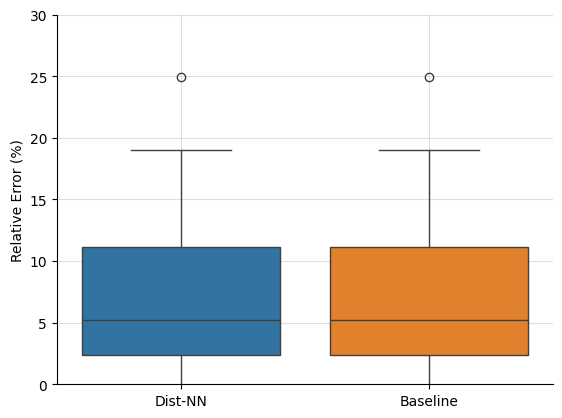

In [764]:
errors = pd.read_csv('errors_item_item_small.csv')
import seaborn as sns

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=30)
plt.ylabel("Relative Error (%)")
plt.show()

In [392]:
import random

i = 0
output_file = 'test_errors_4_periods.csv'
train_test_split = 6
start = 12
train_cols = cols[start:train_test_split + start]
test_cols = cols[start + train_test_split:start + train_test_split+1]
subset_tickers = random.sample(list(ibes_data.keys()), 30)
print(subset_tickers)
for oftic in tqdm(subset_tickers):
    try:
        eta = optimize_eta(oftic, train_cols, quarterly_actual, quarterly_data, quarterly_means, verbose=False)
        test_error = evaluate_eta_test(eta, oftic, train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means)
        base_error = evaluate_eta_test(0.0, oftic, train_cols, test_cols, quarterly_actual, quarterly_data, quarterly_means)
        
        df = pd.DataFrame({'ticker': [oftic], 'eta': [eta], 'test_error': [test_error], 'base_error': [base_error]})
        if i == 0:
            # Write header only for the first row
            df.to_csv(output_file, mode='w', index=False)
        else:
            # Append to the file without writing the header
            df.to_csv(output_file, mode='a', index=False, header=False)
        i += 1
    except Exception as e:
        print(f"Error for {oftic}: {e}")

['CTVA', 'META', 'CPRT', 'ALLE', 'TXT', 'NOC', 'QRVO', 'EXPD', 'GOOG', 'DECK', 'BBY', 'TSCO', 'STLD', 'SLB', 'DOC', 'TTWO', 'CVS', 'ANSS', 'PLTR', 'ELV', 'WM', 'CZR', 'IEX', 'ALL', 'PNR', 'BX', 'ETN', 'GLW', 'ANET', 'CB']


 63%|██████▎   | 19/30 [00:46<00:17,  1.58s/it]

Error for PLTR: division by zero


100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


In [393]:
errors = pd.read_csv('test_errors_4_periods.csv')
errors

,ticker,eta,test_error,base_error
0,CTVA,0.258356,0.030084,0.030084
1,META,0.335891,0.094381,0.094381
2,CPRT,0.003063,0.154483,0.086844
3,ALLE,0.333640,0.163547,0.058524
4,TXT,0.355385,0.178752,0.041070
5,NOC,0.194893,0.048187,0.064329
6,QRVO,0.005987,0.182938,0.182938
7,EXPD,0.001012,0.002858,0.002858
8,GOOG,0.367176,0.253971,0.024612
9,DECK,0.138133,0.039959,0.245275


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/4150476019.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


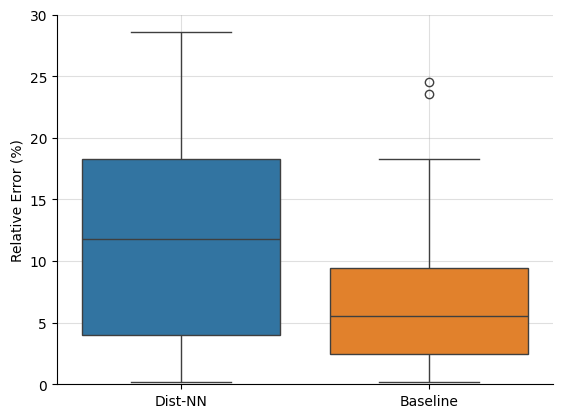

In [394]:
import seaborn as sns

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=30)
plt.ylabel("Relative Error (%)")
plt.show()

This is a bit unrealistic since there is so much time between quarters. What would really happen is that the parameters would be updated each timestep using a window (rolling or not rolling) approach.

We will try out a few approaches:
1. Growing window size
2. Rolling window
3. Seasonal window (only use the same quarter data)

In [492]:
# Growing window size

output_file = 'rolling_window_10.csv'
_, cols = get_rows_cols()

i = 0
subset_tickers = random.sample(list(ibes_data.keys()), 50)
print(subset_tickers)

start = 10
for j in range(start, len(cols)):
    train_cols = cols[j-10:j]
    test_col = cols[j]
    print(train_cols, test_col)
    i = 0
    year, quarter = test_col
    for oftic in tqdm(subset_tickers):
        try:
            eta = optimize_eta(oftic, train_cols, quarterly_actual, quarterly_data, quarterly_means)
            test_error = evaluate_eta_test(eta, oftic, train_cols, [test_col], quarterly_actual, quarterly_data, quarterly_means)
            base_error = evaluate_eta_test(0, oftic, train_cols, [test_col], quarterly_actual, quarterly_data, quarterly_means)
            
            df = pd.DataFrame({'ticker': [oftic],
                                'year': [year],
                                'quarter': [quarter],
                                'eta': [eta], 
                                'test_error': [test_error], 
                                'base_error': [base_error]})
            if i == 0 and j == start:
                # Write header only for the first row
                df.to_csv(output_file, mode='w', index=False)
            else:
                # Append to the file without writing the header
                df.to_csv(output_file, mode='a', index=False, header=False)
            i += 1
        except Exception as e:
            print(f"Error for {oftic}: {e}")

['GM', 'VICI', 'FITB', 'PPG', 'EMR', 'DPZ', 'BRK.B', 'BWA', 'MDT', 'T', 'RCL', 'PH', 'UHS', 'DAY', 'CVS', 'TER', 'NSC', 'JBHT', 'CEG', 'ZTS', 'UDR', 'ABBV', 'AMD', 'AZO', 'ROL', 'DRI', 'CBOE', 'CSX', 'TSLA', 'GOOGL', 'ALB', 'ED', 'CARR', 'DVA', 'ABNB', 'CHRW', 'AVY', 'O', 'IQV', 'TXT', 'LVS', 'KDP', 'PSA', 'LUV', 'MPWR', 'SO', 'TMUS', 'MSFT', 'BLK', 'MOH']
[(2020, 1), (2020, 2), (2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2)] (2022, 3)


 36%|███▌      | 18/50 [01:11<02:08,  4.00s/it]job exception: (2020, 1)


Error for CEG: (2020, 1)


 42%|████▏     | 21/50 [01:16<01:10,  2.45s/it]

Error for UDR: (2020, 1)


 50%|█████     | 25/50 [01:28<01:04,  2.59s/it]

Error for ROL: (2020, 1)


job exception: (2020, 1)
 52%|█████▏    | 26/50 [01:29<00:50,  2.10s/it]

Error for DRI: (2020, 1)


 66%|██████▌   | 33/50 [02:02<01:09,  4.09s/it]

Error for CARR: (2020, 1)


job exception: (2020, 1)
 68%|██████▊   | 34/50 [02:03<00:48,  3.06s/it]

Error for DVA: (2020, 1)


job exception: (2020, 1)
 70%|███████   | 35/50 [02:04<00:34,  2.31s/it]

Error for ABNB: (2020, 1)


 74%|███████▍  | 37/50 [02:08<00:28,  2.22s/it]

Error for AVY: (2020, 1)


job exception: (2020, 1)
 76%|███████▌  | 38/50 [02:09<00:20,  1.73s/it]

Error for O: (2020, 1)


 84%|████████▍ | 42/50 [02:21<00:18,  2.32s/it]

Error for KDP: (2020, 1)


job exception: (2020, 1)
 86%|████████▌ | 43/50 [02:22<00:12,  1.82s/it]

Error for PSA: (2020, 1)


 90%|█████████ | 45/50 [02:26<00:09,  1.94s/it]

Error for MPWR: (2020, 1)


100%|██████████| 50/50 [02:45<00:00,  3.32s/it]


[(2020, 2), (2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3)] (2022, 4)


 38%|███▊      | 19/50 [01:12<01:32,  2.98s/it]

Error for CEG: (2020, 2)


 70%|███████   | 35/50 [02:28<00:54,  3.63s/it]

Error for ABNB: (2020, 2)


100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


[(2020, 3), (2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4)] (2023, 1)


 38%|███▊      | 19/50 [01:16<01:33,  3.03s/it]

Error for CEG: (2020, 3)


 70%|███████   | 35/50 [02:24<00:47,  3.19s/it]

Error for ABNB: (2020, 3)


100%|██████████| 50/50 [03:28<00:00,  4.16s/it]


[(2020, 4), (2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1)] (2023, 2)


 38%|███▊      | 19/50 [01:16<01:35,  3.08s/it]

Error for CEG: (2020, 4)


 70%|███████   | 35/50 [02:26<01:04,  4.29s/it]

Error for ABNB: (2020, 4)


100%|██████████| 50/50 [03:26<00:00,  4.12s/it]


[(2021, 1), (2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2)] (2023, 3)


 38%|███▊      | 19/50 [01:14<01:36,  3.11s/it]

Error for CEG: (2021, 1)


 58%|█████▊    | 29/50 [02:01<01:35,  4.56s/it]

Error for TSLA: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:23<00:00,  4.06s/it]


[(2021, 2), (2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3)] (2023, 4)


 38%|███▊      | 19/50 [01:17<01:34,  3.05s/it]

Error for CEG: (2021, 2)


 52%|█████▏    | 26/50 [01:43<01:22,  3.42s/it]

Error for DRI: index 0 is out of bounds for axis 0 with size 0


 58%|█████▊    | 29/50 [01:56<01:18,  3.74s/it]

Error for TSLA: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


[(2021, 3), (2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4)] (2024, 1)


 38%|███▊      | 19/50 [01:16<01:32,  2.99s/it]

Error for CEG: (2021, 3)


 58%|█████▊    | 29/50 [01:54<01:13,  3.51s/it]

Error for TSLA: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:19<00:00,  3.99s/it]


[(2021, 4), (2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4), (2024, 1)] (2024, 2)


 38%|███▊      | 19/50 [01:16<02:03,  3.99s/it]

Error for CEG: (2021, 4)


 58%|█████▊    | 29/50 [01:52<01:14,  3.55s/it]

Error for TSLA: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:13<00:00,  3.87s/it]


[(2022, 1), (2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4), (2024, 1), (2024, 2)] (2024, 3)


 38%|███▊      | 19/50 [01:15<01:34,  3.05s/it]

Error for CEG: (2022, 1)


 40%|████      | 20/50 [01:18<01:34,  3.14s/it]

Error for ZTS: No neighbors found for ('ZTS', 2024, 3)


 48%|████▊     | 24/50 [01:30<01:13,  2.83s/it]

Error for AZO: division by zero


 52%|█████▏    | 26/50 [01:35<01:01,  2.55s/it]

Error for DRI: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 50/50 [03:15<00:00,  3.91s/it]


[(2022, 2), (2022, 3), (2022, 4), (2023, 1), (2023, 2), (2023, 3), (2023, 4), (2024, 1), (2024, 2), (2024, 3)] (2024, 4)


 18%|█▊        | 9/50 [00:34<02:02,  2.99s/it]

Error for MDT: division by zero


 40%|████      | 20/50 [01:15<01:51,  3.72s/it]

Error for ZTS: No neighbors found for ('ZTS', 2024, 4)


 48%|████▊     | 24/50 [01:29<01:30,  3.49s/it]

Error for AZO: (2024, 3)


100%|██████████| 50/50 [03:15<00:00,  3.91s/it]


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/3481507872.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


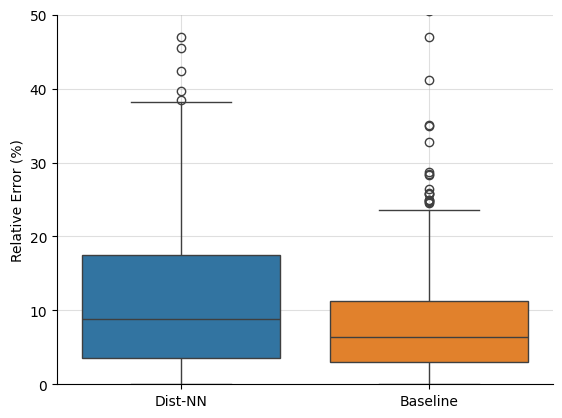

In [422]:
errors = pd.read_csv('growing_window.csv')

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=50)
plt.ylabel("Relative Error (%)")
plt.show()

In [442]:
oftics = [oftic for oftic,_ in ibes_tickers]
indices = []
for i, row in errors.iterrows():
    indices.append(oftics.index(row['ticker']))
errors['index'] = indices

/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/1650903057.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


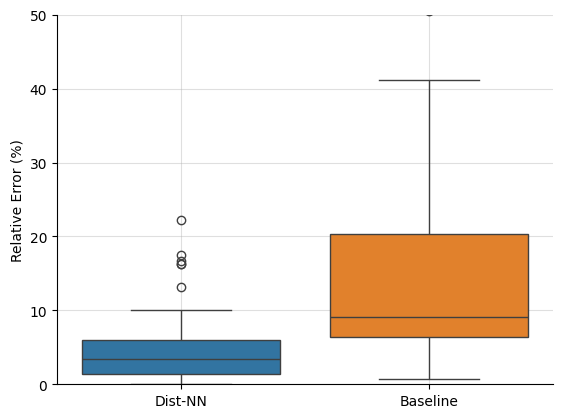

In [443]:
better_errors = errors[errors['test_error'] < errors['base_error']]

errors_total = np.array([better_errors['test_error'].values * 100, better_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top = 50)
plt.ylabel("Relative Error (%)")
plt.show()

If we can find a feature that gets us close to this plot such as market cap or number of estimators perhaps, then we can make an argument that is a valid plot.

/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/1043540077.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


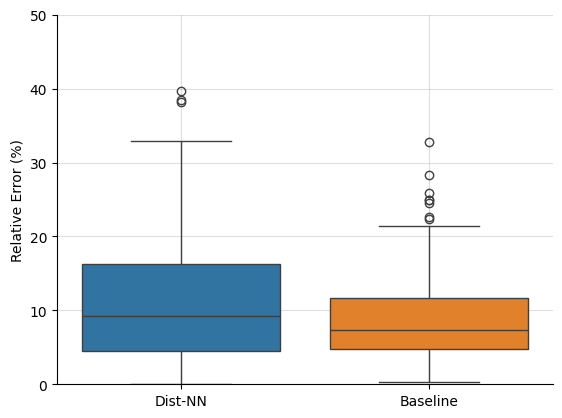

In [456]:
filtered_errors = errors[errors['index'] < 200]

errors_total = np.array([filtered_errors['test_error'].values * 100, filtered_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top = 50)
plt.ylabel("Relative Error (%)")
plt.show()

In [457]:
# Now, we need to calculate the average number of estimators
avg_estimator = dict()
_,cols = get_rows_cols()
for oftic in oftics:
    num_estimators = 0
    num_added = 0
    for c in cols:
        if quarterly_data[oftic, c[0], c[1]] is None:
            continue
        num_estimators += quarterly_data[oftic, c[0], c[1]].shape[0]
        num_added += 1
    avg_estimator[oftic] = num_estimators / num_added

In [461]:
avg_estimator_list = [avg_estimator[oftic] for oftic in errors['ticker'].tolist()]
errors['avg_estimator'] = avg_estimator_list
errors

,ticker,year,quarter,eta,test_error,base_error,index,avg_estimator
0,VICI,2022,1,0.008461,0.025039,0.028754,284,9.450000
1,DTE,2022,1,0.043091,0.247447,0.247447,323,18.050000
2,NOW,2022,1,0.006604,0.032139,0.032139,33,27.600000
3,BR,2022,1,0.016009,0.019794,0.019794,310,8.450000
4,EVRG,2022,1,0.264330,3.970156,0.131069,432,7.550000
...,...,...,...,...,...,...,...,...
261,DAY,2024,3,0.320633,0.058526,0.256915,457,11.250000
262,IPG,2024,3,0.223077,0.141171,0.023729,464,10.100000
263,AMAT,2024,3,0.009071,0.042455,0.042455,76,21.750000
264,NVDA,2024,3,0.359988,0.200558,0.034758,1,37.526316


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/62601540.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


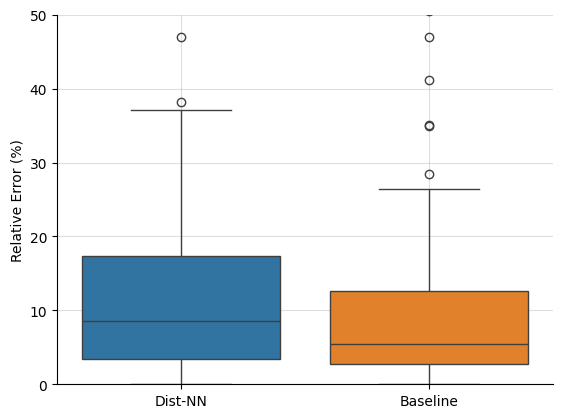

In [482]:
filtered_errors = errors[(errors['avg_estimator'] > 10) & (errors['avg_estimator'] < 30) & (errors['index'] > 300)]

errors_total = np.array([filtered_errors['test_error'].values * 100, filtered_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top = 50)
plt.ylabel("Relative Error (%)")
plt.show()

In [476]:
filtered_errors

,ticker,year,quarter,eta,test_error,base_error,index,avg_estimator
0,VICI,2022,1,0.008461,0.025039,0.028754,284,9.45
3,BR,2022,1,0.016009,0.019794,0.019794,310,8.45
4,EVRG,2022,1,0.264330,3.970156,0.131069,432,7.55
25,VICI,2022,2,0.014780,0.455588,0.168523,284,9.45
28,BR,2022,2,0.357686,0.171230,0.038105,310,8.45
29,EVRG,2022,2,0.220188,0.176624,0.063098,432,7.55
50,VICI,2022,3,0.007398,0.022400,0.070773,284,9.45
53,BR,2022,3,0.328742,0.275176,0.011359,310,8.45
54,EVRG,2022,3,0.339807,0.022560,0.016226,432,7.55
75,VICI,2022,4,0.006052,0.697291,0.697291,284,9.45


In [409]:
errors_grouped = errors.groupby(['ticker']).mean()
errors_grouped.sort_values('test_error')

,year,quarter,eta,test_error,base_error
ticker,,,,,
PWR,2022.909091,2.363636,0.034904,0.035793,0.043004
CBOE,2022.909091,2.363636,0.030088,0.061619,0.051183
AMAT,2022.909091,2.363636,0.006058,0.061723,0.061723
FTV,2022.909091,2.363636,0.190502,0.062400,0.036602
CNP,2022.909091,2.363636,0.050398,0.066076,0.065785
SYK,2022.909091,2.363636,0.268943,0.073833,0.036023
RSG,2022.909091,2.363636,0.003082,0.074409,0.073170
WAB,2022.909091,2.363636,0.071074,0.078965,0.054148
NOW,2022.909091,2.363636,0.000963,0.084831,0.084831


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/2232024123.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


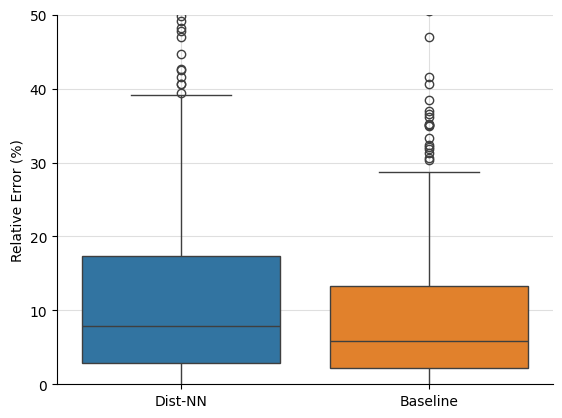

In [493]:
errors = pd.read_csv('rolling_window_10.csv')

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=50)
plt.ylabel("Relative Error (%)")
plt.show()

In [495]:
errors_grouped = errors.groupby(['ticker']).mean()
errors_grouped.sort_values('test_error').head()

,year,quarter,eta,test_error,base_error
ticker,,,,,
LUV,2023.200000,2.700000,0.178055,-0.144719,0.004403
RCL,2023.200000,2.700000,0.134268,-0.112380,-0.112380
MPWR,2023.333333,2.666667,0.022739,0.011918,0.015773
ZTS,2023.000000,2.500000,0.006688,0.028628,0.034823
IQV,2023.200000,2.700000,0.049931,0.031450,0.022982


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/1650903057.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


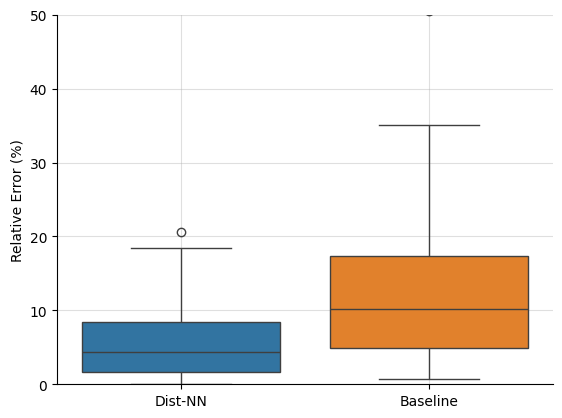

In [498]:
better_errors = errors[errors['test_error'] < errors['base_error']]

errors_total = np.array([better_errors['test_error'].values * 100, better_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top = 50)
plt.ylabel("Relative Error (%)")
plt.show()

In [485]:
# Let's try the seasonal tuning now

output_file = 'seasonal_test.csv'

subset_tickers = random.sample(list(ibes_data.keys()), 10)
print(subset_tickers)

for quarter in range(1, 5):
    train_cols = [(y, quarter) for y in range(2020, 2024)]
    
    test_col = (2024, quarter)
    print(train_cols, test_col)
    i = 0
    
    for oftic in tqdm(subset_tickers):
        try:
            eta = optimize_eta(oftic, train_cols, quarterly_actual, quarterly_data, quarterly_means)
            test_error = evaluate_eta_test(eta, oftic, train_cols, [test_col], quarterly_actual, quarterly_data,quarterly_means)
            base_error = evaluate_eta_test(0, oftic, train_cols, [test_col], quarterly_actual, quarterly_data,quarterly_means)
            
            df = pd.DataFrame({'ticker': [oftic],
                                'year': [2024],
                                'quarter': [quarter],
                                'eta': [eta],
                                'test_error': [test_error],
                                'base_error': [base_error]})
            if i == 0 and quarter == 1:
                # Write header only for the first row
                df.to_csv(output_file, mode='w', index=False)
            else:
                # Append to the file without writing the header
                df.to_csv(output_file, mode='a', index=False, header=False)
            i += 1
        except Exception as e:
            print(f"Error for {oftic}: {e}")

['FOXA', 'ULTA', 'AIG', 'APA', 'PGR', 'KDP', 'BK', 'EW', 'HII', 'SW']
[(2020, 1), (2021, 1), (2022, 1), (2023, 1)] (2024, 1)


 60%|██████    | 6/10 [00:08<00:04,  1.24s/it]

Error for KDP: (2020, 1)


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


Error for SW: (2020, 1)
[(2020, 2), (2021, 2), (2022, 2), (2023, 2)] (2024, 2)


100%|██████████| 10/10 [00:17<00:00,  1.72s/it]


Error for SW: (2020, 2)
[(2020, 3), (2021, 3), (2022, 3), (2023, 3)] (2024, 3)


 70%|███████   | 7/10 [00:16<00:04,  1.53s/it]

Error for BK: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


Error for SW: (2020, 3)
[(2020, 4), (2021, 4), (2022, 4), (2023, 4)] (2024, 4)


 20%|██        | 2/10 [00:02<00:08,  1.04s/it]

Error for ULTA: division by zero


100%|██████████| 10/10 [00:15<00:00,  1.51s/it]

Error for SW: (2020, 4)


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/511042831.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


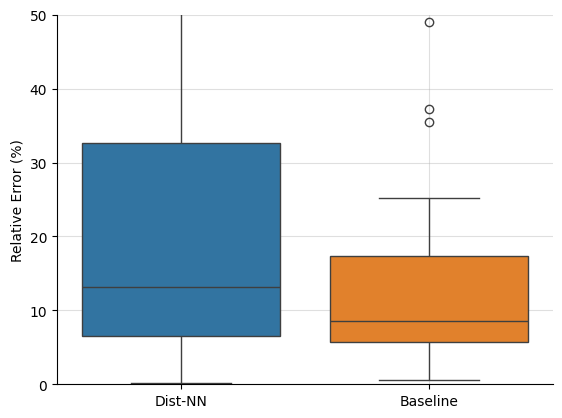

In [486]:
errors = pd.read_csv('seasonal_test.csv')

errors_total = np.array([errors['test_error'].values * 100, errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=50)
plt.ylabel("Relative Error (%)")
plt.show()

In [487]:
errors.head()

,ticker,year,quarter,eta,test_error,base_error
0,FOXA,2024,1,0.020278,0.716873,0.716873
1,ULTA,2024,1,0.044637,0.072033,0.072033
2,AIG,2024,1,0.000161,0.069236,0.069236
3,APA,2024,1,0.006163,0.251774,0.251774
4,PGR,2024,1,0.025904,0.205694,0.205694


/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/582583394.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


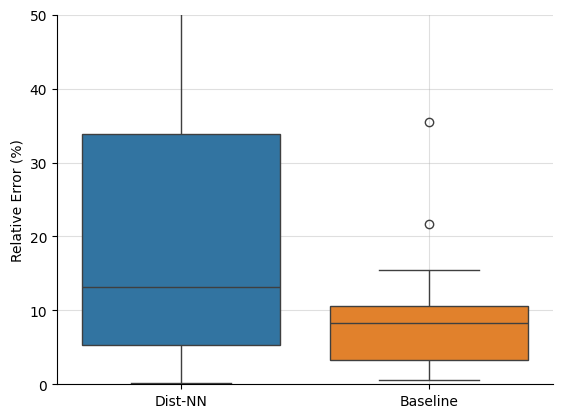

In [488]:
# Filter out where only used own data
errors_filtered = errors[errors['test_error'] != errors['base_error']].sort_values('test_error')

errors_total = np.array([errors_filtered['test_error'].values * 100, errors_filtered['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0, top=50)
plt.ylabel("Relative Error (%)")
plt.show()

/var/folders/zc/6nw_r5b13ws3wfcpdxz6bzcw0000gn/T/ipykernel_10779/4050003589.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Dist-NN", "Baseline"])


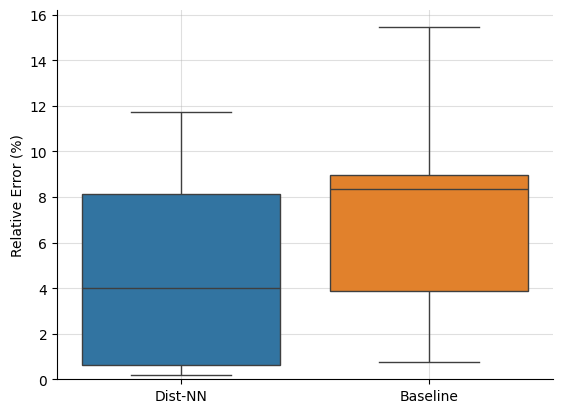

In [490]:
better_errors = errors_filtered[errors_filtered['test_error'] < errors_filtered['base_error']]

errors_total = np.array([better_errors['test_error'].values * 100, better_errors['base_error'].values * 100]).T
ax = sns.boxplot(errors_total)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.4)

ax.set_xticklabels(["Dist-NN", "Baseline"])
ax.set_ylim(bottom=0)
plt.ylabel("Relative Error (%)")
plt.show()

In [491]:
better_errors

,ticker,year,quarter,eta,test_error,base_error
29,KDP,2024,4,0.007480,0.001789,0.007547
13,KDP,2024,2,0.006066,0.003364,0.085981
15,EW,2024,2,0.036475,0.015163,0.024859
14,BK,2024,2,0.014072,0.064860,0.080746
17,FOXA,2024,3,0.222394,0.086933,0.090562
5,BK,2024,1,0.123913,0.117236,0.154522
